# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from openweatherkey import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# create lists to fill using for loop in api call
city_list=[]
cloudiness_list=[]
country_list=[]
date_list=[]
humidity_list=[]
lat_list=[]
lng_list=[]
max_temp_list=[]
wind_speed_list=[]


# create index counter at 0 and set the counter to 1
index_count=0
set_count=1

In [9]:
# get url setup for the json request
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
updated_url = f"{base_url}units={units}&appid={weather_api_key}&q="

#print header data
print('Beginning Data Retrieval')
print('-----------------------------')

# start for loop uring try and except across all lists to fill lists, and omit missing data 
for city in cities:
    query_url=updated_url+city
    response=requests.get(query_url).json()
    #if statement for set count of 50
    if index_count < 50:
        index_count = index_count + 1
    else:
        set_count = set_count + 1
        index_count=0
        
# run print statement to print through record counter, index counter, and city
    print(f'Processing Record {index_count} of Set {set_count} | {city}')    
    try:
        city_list.append(response['name'])
        cloudiness_list.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response['main']['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
    except:
        print("City not found. Skipping...")
    
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')       
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | itoman
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | lermontovka
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | giddalur
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | labuhan
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | burgeo
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | nouadh

Processing Record 34 of Set 4 | port moresby
Processing Record 35 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 36 of Set 4 | jinchang
Processing Record 37 of Set 4 | airai
Processing Record 38 of Set 4 | gorontalo
Processing Record 39 of Set 4 | muli
Processing Record 40 of Set 4 | port-gentil
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | kaduqli
Processing Record 43 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 44 of Set 4 | bambari
Processing Record 45 of Set 4 | tapaua
City not found. Skipping...
Processing Record 46 of Set 4 | tayshet
Processing Record 47 of Set 4 | mae sai
Processing Record 48 of Set 4 | lasa
Processing Record 49 of Set 4 | lakatoro
Processing Record 50 of Set 4 | kaeo
Processing Record 0 of Set 5 | sobolevo
Processing Record 1 of Set 5 | toliary
City not found. Skipping...
Processing Record 2 of Set 5 | artesia
Processing Record 3 of Set 5 | araouane
Processing Record 4 of Set 5 | khandbar

Processing Record 21 of Set 8 | pastavy
Processing Record 22 of Set 8 | mithimna
City not found. Skipping...
Processing Record 23 of Set 8 | cao bang
Processing Record 24 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 25 of Set 8 | nabire
Processing Record 26 of Set 8 | beringovskiy
Processing Record 27 of Set 8 | bayanday
Processing Record 28 of Set 8 | pacific grove
Processing Record 29 of Set 8 | terrace bay
Processing Record 30 of Set 8 | malpe
Processing Record 31 of Set 8 | yakeshi
Processing Record 32 of Set 8 | meridian
Processing Record 33 of Set 8 | mwinilunga
Processing Record 34 of Set 8 | wadi maliz
Processing Record 35 of Set 8 | broken hill
Processing Record 36 of Set 8 | vung tau
Processing Record 37 of Set 8 | sohag
Processing Record 38 of Set 8 | necochea
Processing Record 39 of Set 8 | broome
Processing Record 40 of Set 8 | aklavik
Processing Record 41 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 8 | teb

Processing Record 5 of Set 12 | imperatriz
Processing Record 6 of Set 12 | porto novo
Processing Record 7 of Set 12 | acajutla
Processing Record 8 of Set 12 | asau
Processing Record 9 of Set 12 | villazon
Processing Record 10 of Set 12 | galle
Processing Record 11 of Set 12 | llanes
Processing Record 12 of Set 12 | belen
Processing Record 13 of Set 12 | ribeira brava
Processing Record 14 of Set 12 | baykit
Processing Record 15 of Set 12 | klyuchi
Processing Record 16 of Set 12 | morococha
Processing Record 17 of Set 12 | machali
Processing Record 18 of Set 12 | kitwe
Processing Record 19 of Set 12 | litoral del san juan
City not found. Skipping...
Processing Record 20 of Set 12 | wysokie mazowieckie
Processing Record 21 of Set 12 | marsh harbour
Processing Record 22 of Set 12 | anadyr
Processing Record 23 of Set 12 | teguldet
Processing Record 24 of Set 12 | atherton
Processing Record 25 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 26 of Set 12 | mandurah
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# order dic columns as show in example
weather_dict=({
    'City':city_list,
    'Latitude':lat_list,
    'Longitude':lng_list,
    'Max Temp':max_temp_list,
    'Humidity':humidity_list,
    'Cloudiness':cloudiness_list,
    'Wind Speed':wind_speed_list,
    'Country':country_list,
    'Date':date_list
})
weather_df=pd.DataFrame(weather_dict)

weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pisco,-13.7000,-76.2167,70.00,83,40,2.30,PE,1612850231
1,Port Lincoln,-34.7333,135.8667,75.99,49,19,8.39,AU,1612850292
2,Bluff,-46.6000,168.3333,53.89,83,100,11.92,NZ,1612850292
3,Port Elizabeth,-33.9180,25.5701,73.40,64,0,2.30,ZA,1612850292
4,Vaini,-21.2000,-175.2000,77.00,100,90,20.71,TO,1612850236
...,...,...,...,...,...,...,...,...,...
586,Wagar,16.1525,36.2032,71.08,62,0,9.08,SD,1612850392
587,Jiaocheng,24.6774,116.1389,63.48,69,100,4.23,CN,1612850392
588,Xiuyan,40.2928,123.2744,40.68,62,0,5.30,CN,1612850392
589,Sunrise Manor,36.2111,-115.0731,59.00,23,75,9.22,US,1612850173


In [42]:
# use describe to produce summary statistics
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.784652,12.703756,52.062340,71.897163,51.732270,8.184220,1.612507e+09
std,32.752379,87.834367,30.529612,21.058830,40.037029,5.564629,6.633503e+01
min,-54.800000,-179.166700,-45.400000,13.000000,0.000000,0.220000,1.612507e+09
25%,-7.122600,-65.254850,33.795000,62.000000,3.750000,4.102500,1.612507e+09
50%,22.591500,19.175600,61.025000,78.000000,50.000000,6.910000,1.612507e+09
75%,46.658275,80.299125,76.627500,87.000000,90.250000,10.987500,1.612507e+09
max,78.218600,178.416700,95.340000,100.000000,100.000000,31.070000,1.612507e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# use describe to produce summary statistics
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,19.779741,18.034042,49.850288,73.397631,55.186125,8.152809,1.612850e+09
std,32.897760,89.977361,30.768198,20.637450,38.702374,6.173703,5.819959e+01
min,-54.800000,-179.166700,-43.600000,10.000000,0.000000,0.250000,1.612850e+09
25%,-6.932750,-63.561600,28.545000,64.000000,19.000000,3.490000,1.612850e+09
50%,25.519800,22.263300,59.000000,79.000000,65.000000,6.670000,1.612850e+09
75%,46.908150,97.601550,75.000000,88.000000,92.500000,11.160000,1.612850e+09
max,78.218600,179.316700,102.200000,100.000000,100.000000,39.120000,1.612850e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
outliers_df=weather_df[weather_df['Humidity']>=99.9]
outliers_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Vaini,-21.2000,-175.2000,77.00,100,90,20.71,TO,1612850236
163,Arrondissement de Mende,44.6667,3.5000,31.59,100,100,4.72,FR,1612850321
190,Vila Franca do Campo,37.7167,-25.4333,60.01,100,75,18.41,PT,1612850303
273,San Patricio,28.0170,-97.5169,69.01,100,90,4.61,US,1612850340
302,Hakkâri Province,37.5833,44.1667,12.20,100,90,2.30,TR,1612850345
344,Kasane,-17.8167,25.1500,68.00,100,75,9.22,BW,1612850352
409,Idenao,4.2475,9.0047,80.60,100,20,8.05,CM,1612850363
425,Balaguer,41.7912,0.8109,42.01,100,0,6.91,ES,1612850366
430,Presidente Olegário,-18.4178,-46.4181,60.01,100,16,1.74,BR,1612850367
446,Husavik,66.0449,-17.3389,28.40,100,90,3.44,IS,1612850369


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_df.drop(weather_df[weather_df['Humidity']>=99.9].index,inplace=False)
sorted_clean_city=clean_city_data.sort_values(by=['City'],ascending=True)
sorted_clean_city.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
306,Aasiaat,68.7098,-52.8699,14.04,88,0,9.26,GL,1612850346
260,Abu Dhabi,24.4667,54.3667,69.80,73,0,6.91,AE,1612850269
523,Acajutla,13.5928,-89.8275,76.89,80,22,6.73,SV,1612850382
305,Acaraú,-2.8856,-40.1200,78.28,86,94,7.45,BR,1612850059
334,Adeje,28.1227,-16.7260,62.01,77,40,8.05,ES,1612850237
246,Ahipara,-35.1667,173.1667,69.78,80,98,11.43,NZ,1612850336
172,Airai,-8.9266,125.4092,70.57,90,100,5.35,TL,1612850323
33,Akdağmadeni,39.6603,35.8836,42.24,62,71,9.37,TR,1612850297
480,Aketi,2.7388,23.7833,69.46,40,100,1.72,CD,1612850375
364,Aklavik,68.2191,-135.0107,-40.00,74,42,3.44,CA,1612850255


In [18]:
weather_time=weather_df
weather_time=pd.to_datetime(weather_time['Date'],unit='s')
weather_time.head(1)

0   2021-02-09 05:57:11
Name: Date, dtype: datetime64[ns]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

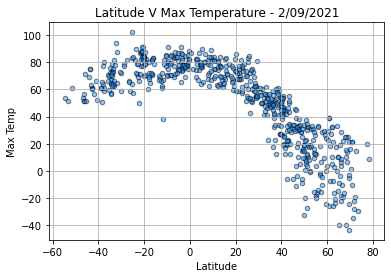

In [35]:
#Latitude vs. Temperature Plot
weather_df.plot(kind='scatter',x="Latitude",y='Max Temp',c='dodgerblue',edgecolor='black',alpha=.5)
#add headers and axis labels
plt.title('Latitude V Max Temperature - 2/09/2021')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
#add grid lines
plt.grid()

#save figure
plt.savefig('../Images/LatvMaxTemp.png')

## Latitude vs. Humidity Plot

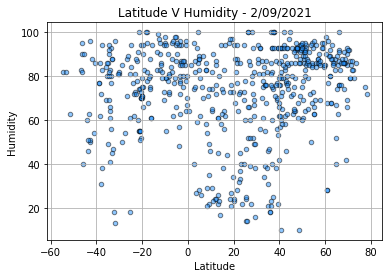

In [36]:
#Latitude vs. Humidity Plot
weather_df.plot(kind='scatter',x="Latitude",y='Humidity',c='dodgerblue',edgecolor='black',alpha=.5)
#add headers and axis labels
plt.title('Latitude V Humidity - 2/09/2021')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
#add grid lines
plt.grid()

#save figure
plt.savefig('../Images/LatvHumidity.png')

## Latitude vs. Cloudiness Plot

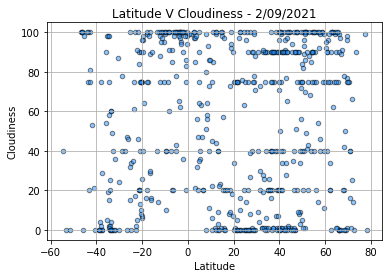

In [37]:
#Latitude vs. Cloudiness Plot
weather_df.plot(kind='scatter',x="Latitude",y='Cloudiness',c='dodgerblue',edgecolor='black',alpha=.5)
#add headers and axis labels
plt.title('Latitude V Cloudiness - 2/09/2021')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#add grid lines
plt.grid()

#save figure
plt.savefig('../Images/LatvCloudiness.png')

## Latitude vs. Wind Speed Plot

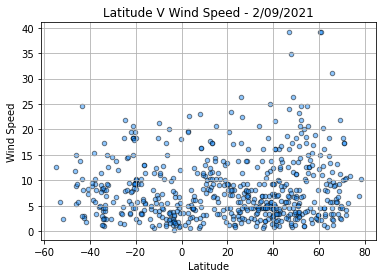

In [34]:
#Latitude vs. Wind SpeedPlot
weather_df.plot(kind='scatter',x="Latitude",y='Wind Speed',c='dodgerblue',edgecolor='black',alpha=.5)
#add headers and axis labels
plt.title('Latitude V Wind Speed - 2/09/2021')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#add grid lines
plt.grid()

#save figure
plt.savefig('../Images/LatvWind Speed.png')

## Linear Regression

In [46]:
#create dataframes for the northern and souther hemisphere to use during linear regression
northern_df=weather_df.loc[weather_df['Latitude']>=0]
southern_df=weather_df.loc[weather_df['Latitude']<0]

In [42]:
#import linregress to use throughout the rest of the code
from scipy.stats import linregress


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.87
The linear equation is:y = -1.41x + 93.12


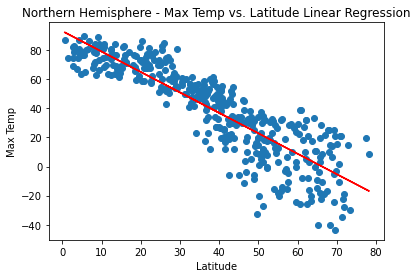

In [44]:
#set values to plot
x_values = northern_df['Latitude']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#set title, xlabel, and ylabel
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# print rvalue,line_eq 
print(f"The r value is: {round(rvalue,2)}")
print(f"The linear equation is:{line_eq}")
plt.savefig('../Images/LR_NH_LatVMaxTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.51
The linear equation is:y = 0.39x + 82.0


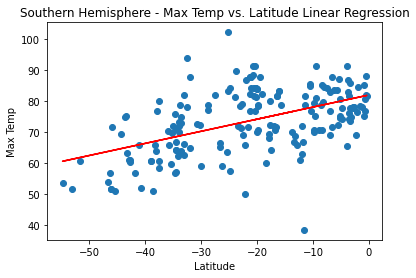

In [47]:
#set values to plot
x_values = southern_df['Latitude']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#set title, xlabel, and ylabel
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# print rvalue,line_eq 
print(f"The r value is: {round(rvalue,2)}")
print(f"The linear equation is:{line_eq}")
plt.savefig('../Images/LR_SH_LatVMaxTemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.34
The linear equation is:y = 0.4x + 56.77


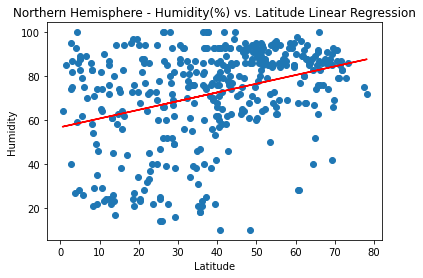

In [48]:
#set values to plot
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#set title, xlabel, and ylabel
plt.title('Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# print rvalue,line_eq 
print(f"The r value is: {round(rvalue,2)}")
print(f"The linear equation is:{line_eq}")
plt.savefig('../Images/LR_NH_LatVHumidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.26
The linear equation is:y = 0.32x + 83.06


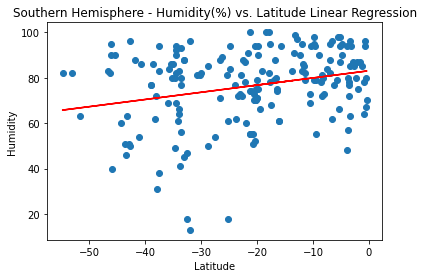

In [49]:
#set values to plot
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#set title, xlabel, and ylabel
plt.title('Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# print rvalue,line_eq 
print(f"The r value is: {round(rvalue,2)}")
print(f"The linear equation is:{line_eq}")
plt.savefig('../Images/LR_SH_LatVHumidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.1
The linear equation is:y = 0.21x + 45.47


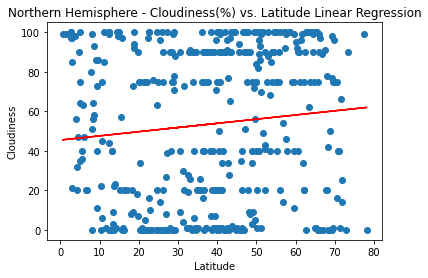

In [50]:
#set values to plot
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#set title, xlabel, and ylabel
plt.title('Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# print rvalue,line_eq 
print(f"The r value is: {round(rvalue,2)}")
print(f"The linear equation is:{line_eq}")
plt.savefig('../Images/LR_NH_LatVCloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.42
The linear equation is:y = 1.18x + 83.58


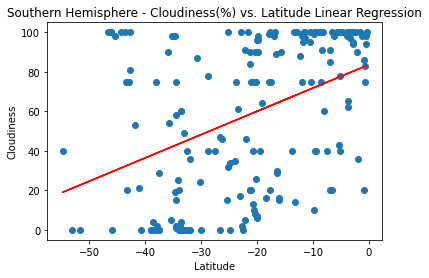

In [53]:
#set values to plot
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#set title, xlabel, and ylabel
plt.title('Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# print rvalue,line_eq 
print(f"The r value is: {round(rvalue,2)}")
print(f"The linear equation is:{line_eq}")
plt.savefig('../Images/LR_SH_LatVCloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.08
The linear equation is:y = 0.03x + 7.4


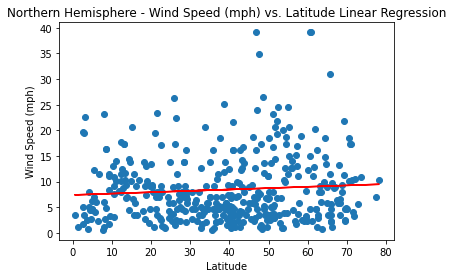

In [54]:
#set values to plot
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#set title, xlabel, and ylabel
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# print rvalue,line_eq 
print(f"The r value is: {round(rvalue,2)}")
print(f"The linear equation is:{line_eq}")
plt.savefig('../Images/LR_NH_LatVWindSpeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.14
The linear equation is:y = -0.06x + 6.4


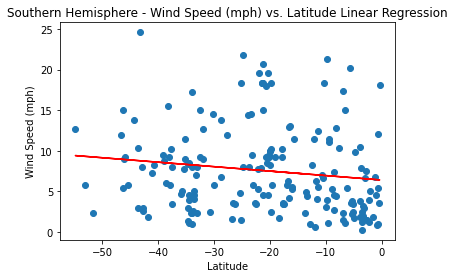

In [55]:
#set values to plot
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#set title, xlabel, and ylabel
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# print rvalue,line_eq 
print(f"The r value is: {round(rvalue,2)}")
print(f"The linear equation is:{line_eq}")
plt.savefig('../Images/LR_SH_LatVWindSpeed.png')